In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Clean_Dataset.csv")
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
#finding no of catagorical and numarical data

d_type=(data.dtypes)
categorical = numerical = 0
for x in d_type:
    categorical += (str(x) == 'object')
    numerical += (str(x) != 'object')


### creating text file for checking the unique values and datatypes

In [5]:
#creating text file for checking the unique values and datatypes

s = ""
s += "Categorical count: %d | Numerical Count: %d\n" % (categorical, numerical)
col=list(data)
for i in range(1,12):
    src = pd.unique(data.iloc[:,i])
    
    s += col[i]+ " has " + str(len(src)) + " unique values -->"+"\n" + str(src)+ " Data type = "+ str(type(src[0])) + "\n" 

with open("output.txt", "w") as f:
    f.write(s)
    f.close()

### Function for plotting the pie chart

In [6]:
#func for ploting pie chart
def plot_chart(col_no):
    """Plots a pie chart showing the distribution of data with their count"""
    title = col[col_no]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    val = pd.unique(data.iloc[:,col_no])
    count = []
    for i in range(len(val)):
        count += [list(data.iloc[:,col_no]).count(val[i])]
    count
    def absolute_value(x):
        a  = round(x/100*sum(count))
        return a
    ax.pie(count, labels = val,autopct=absolute_value)
    plt.title(title,fontname="Times New Roman",fontweight="bold")

    plt.show()
#     plt.close()

### plots of the Categorical data

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


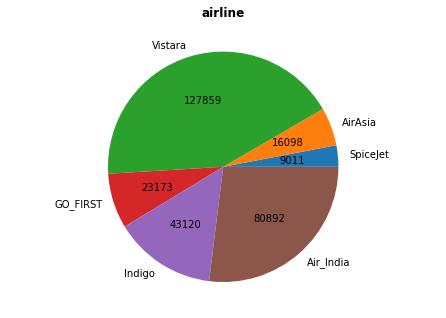

In [7]:
plot_chart(1)

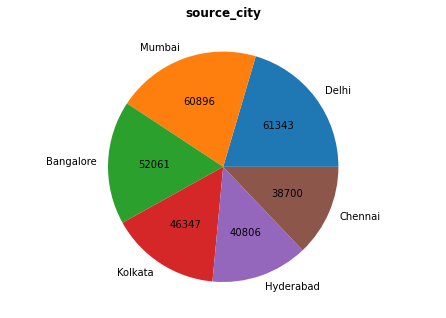

In [8]:
plot_chart(3)

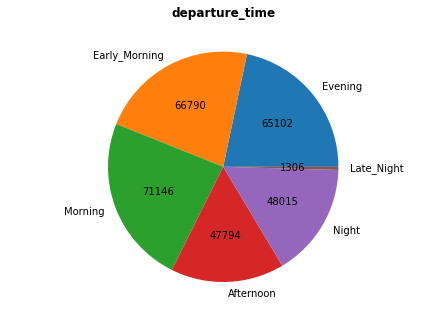

In [9]:
plot_chart(4)

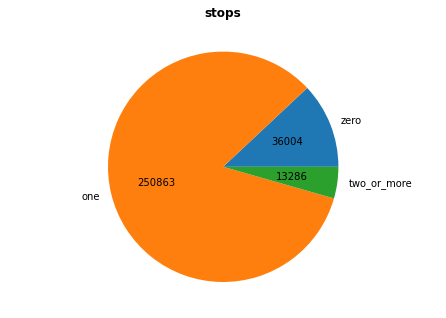

In [10]:
plot_chart(5)

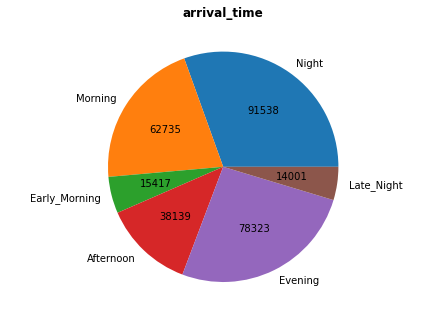

In [11]:
plot_chart(6)

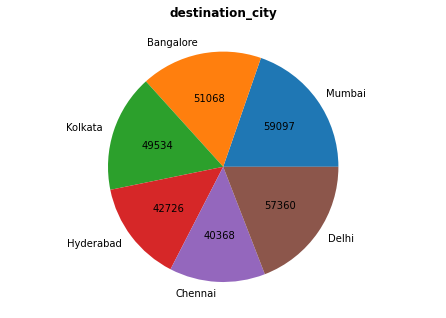

In [12]:
plot_chart(7)

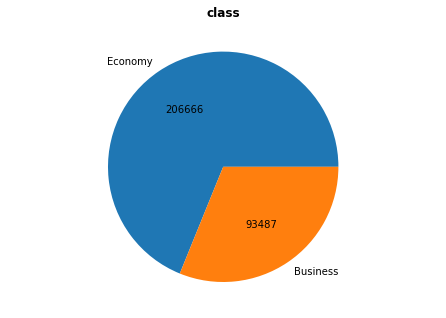

In [13]:
plot_chart(8)

### Function for plotting Histograms 

In [14]:


def plot_hist(col_no,lo,hi,gap,x_label,y_label):

# Creating dataset
    a = np.array(data.iloc[:,col_no])
    title = col[col_no]
    font1 = {'family':'serif','color':'blue','size':15}
    # Creating histogram
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(a,bins=list(range(lo, hi,gap)))
    plt.title(title,fontname="serif",fontweight="bold" ,size=20)
    plt.xlabel(x_label,fontdict = font1)
    plt.ylabel(y_label,fontdict = font1)
    # Show plot
    plt.show()


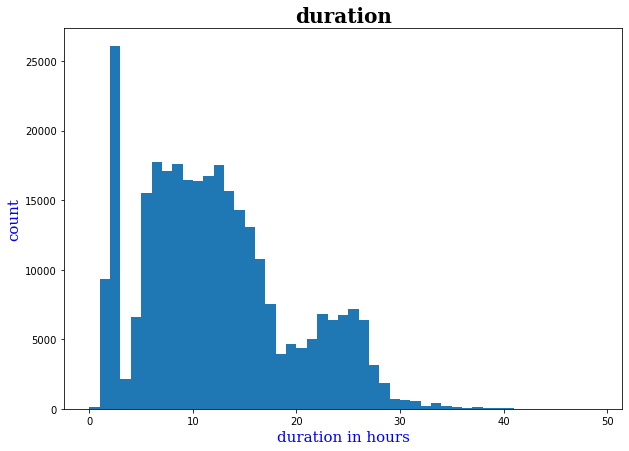

In [15]:
plot_hist(9,0,50,1,"duration in hours" ,"count")

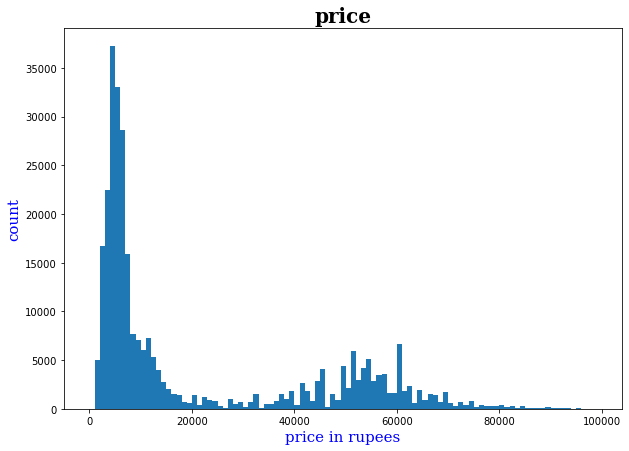

In [16]:
plot_hist(11,0,100000,1000,"price in rupees","count")

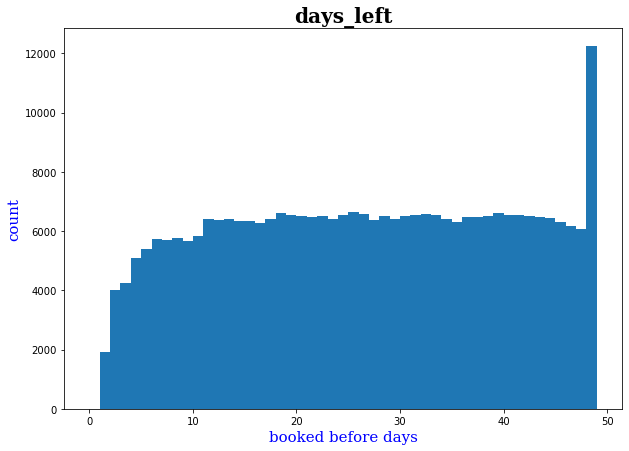

In [17]:
plot_hist(10,0,50,1,"booked before days","count")

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_left', ylabel='Density'>

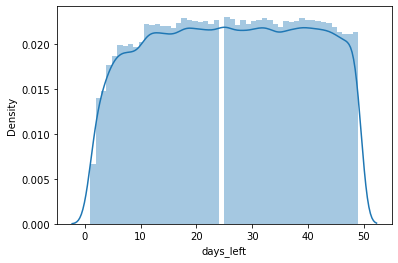

In [18]:
sns.distplot(data['days_left'])

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_left', ylabel='Density'>

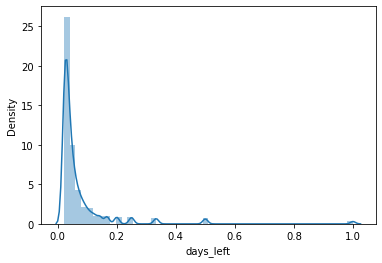

In [19]:
new_days_left = 1 / (data['days_left'])
# cp['price_log']=np.log(cp['price'])
sns.distplot(new_days_left)

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_left', ylabel='Density'>

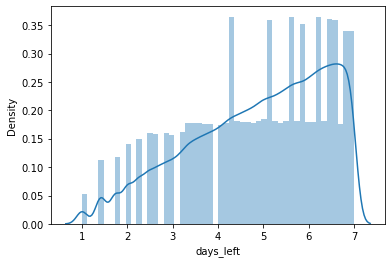

In [20]:
new_days_left = np.sqrt(data['days_left'])
# cp['price_log']=np.log(cp['price'])
sns.distplot(new_days_left)

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_left', ylabel='Density'>

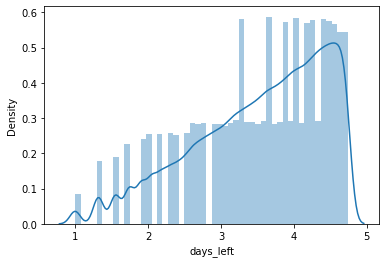

In [21]:
new_days_left = data['days_left']**(1/2.5)
# cp['price_log']=np.log(cp['price'])
sns.distplot(new_days_left)

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

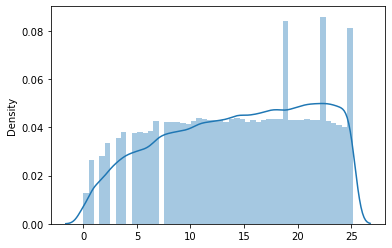

In [22]:
new_days_left, parameters = stats.boxcox(data['days_left'])
# cp['price_log']=np.log(cp['price'])
sns.distplot(new_days_left)

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

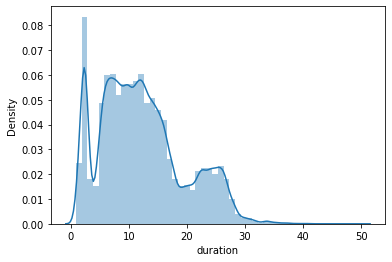

In [23]:
sns.distplot(data['duration'])

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

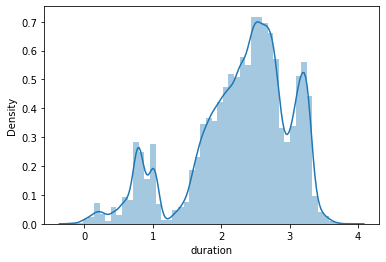

In [24]:

new_duration = np.log(data['duration'])
# cp['price_log']=np.log(cp['price'])
sns.distplot(new_duration)

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

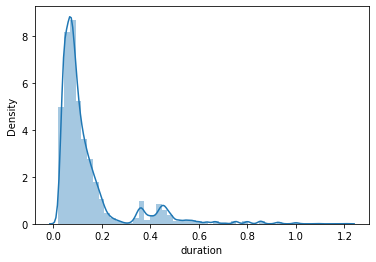

In [25]:
new_duration = 1/data['duration']
# cp['price_log']=np.log(cp['price'])
sns.distplot(new_duration)

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

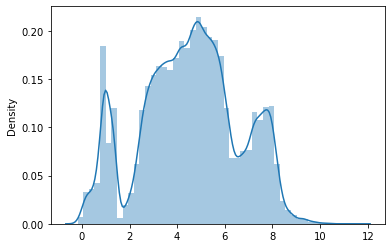

In [26]:
new_days_left, parameters = stats.boxcox(data['duration'])
# cp['price_log']=np.log(cp['price'])
sns.distplot(new_days_left)

sklearn minmaxscaler

/home/viboo27/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

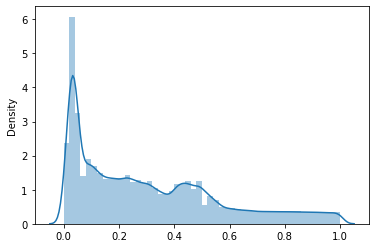

In [27]:
from sklearn import preprocessing
daata = data[['days_left','duration','price']]
scaler=preprocessing.MinMaxScaler()
minmax_df=scaler.fit_transform(daata)
sns.distplot(minmax_df)


<AxesSubplot:>

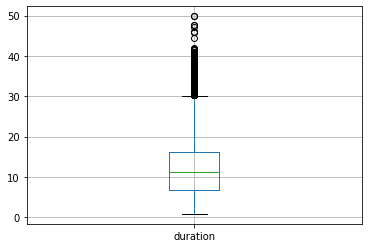

In [28]:
data.boxplot(column='duration')

<AxesSubplot:>

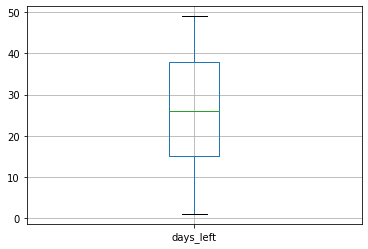

In [29]:
data.boxplot(column='days_left')

In [31]:

quantiles = []

def find_quantiles(name):
    q1, q2, q3 = data[name].quantile(0.25), data[name].quantile(0.5), data[name].quantile(0.75)
    return [q1, q2, q3]
data = data.copy()
for name in ['duration','days_left']:
    q1, q2, q3 = find_quantiles(name)
    iqr = q3 - q1
    max_range = q3 + 1.5*iqr
    min_range = q1 - 1.5*iqr
    print(name, min_range, max_range, min(data[name]), max(data[name]))
    count = 0
    data[data[name] >= max_range] = max_range
    data[data[name] <= min_range] = min_range
    quantiles += [[name, q1, q2, q3, iqr, min_range, max_range, count, data]]
    


    

duration -7.1800000000000015 30.180000000000003 0.83 49.83
days_left -19.5 72.5 1.0 49.0


In [32]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3.0,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148.0,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49.0,69265.0
300149,300149.0,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
300150,300150.0,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
300151,300151.0,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


<AxesSubplot:>

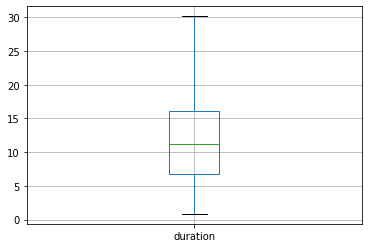

In [33]:
data.boxplot(column='duration')

<AxesSubplot:>

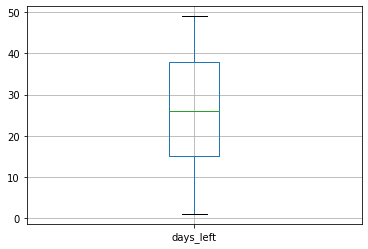

In [34]:
data.boxplot(column='days_left')

<AxesSubplot:>

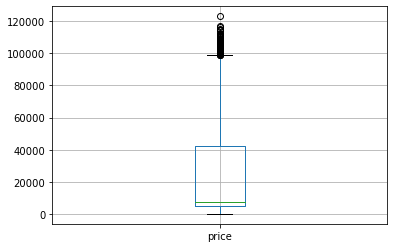

In [35]:
data.boxplot(column='price')

In [36]:
def find_quantiles(name):
    q1, q2, q3 = data[name].quantile(0.25), data[name].quantile(0.5), data[name].quantile(0.75)
    return [q1, q2, q3]
for name in ['duration', 'price', 'days_left']:
    q1, q2, q3 = find_quantiles(name)
    iqr = q3 - q1
    max_range = q3 + 1.5*iqr
    min_range = q1 - 1.5*iqr
    print(name, len([x for x in data[name] if x > max_range or x < min_range]))

duration 0
price 123
days_left 0


In [37]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more', 30.180000000000003], dtype=object)

In [38]:
data['stops'].head

<bound method NDFrame.head of 0         zero
1         zero
2         zero
3         zero
4         zero
          ... 
300148     one
300149     one
300150     one
300151     one
300152     one
Name: stops, Length: 300153, dtype: object>

In [39]:
data['class'].head

<bound method NDFrame.head of 0          Economy
1          Economy
2          Economy
3          Economy
4          Economy
            ...   
300148    Business
300149    Business
300150    Business
300151    Business
300152    Business
Name: class, Length: 300153, dtype: object>

In [41]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

data.replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace = True)

In [42]:
data['stops'].head

<bound method NDFrame.head of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
300148    1.0
300149    1.0
300150    1.0
300151    1.0
300152    1.0
Name: stops, Length: 300153, dtype: float64>

In [43]:
data.replace({"Business": 0, "Economy": 1}, inplace = True)
data['class'].head              
              

<bound method NDFrame.head of 0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
300148    0.0
300149    0.0
300150    0.0
300151    0.0
300152    0.0
Name: class, Length: 300153, dtype: float64>

In [44]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.0,SpiceJet,SG-8709,Delhi,Evening,0.0,Night,Mumbai,1.0,2.17,1.0,5953.0
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,0.0,Morning,Mumbai,1.0,2.33,1.0,5953.0
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,0.0,Early_Morning,Mumbai,1.0,2.17,1.0,5956.0
3,3.0,Vistara,UK-995,Delhi,Morning,0.0,Afternoon,Mumbai,1.0,2.25,1.0,5955.0
4,4.0,Vistara,UK-963,Delhi,Morning,0.0,Morning,Mumbai,1.0,2.33,1.0,5955.0


In [45]:
# drop flight name 
del data['flight']
del data['Unnamed: 0']

In [46]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0.0,Night,Mumbai,1.0,2.17,1.0,5953.0
1,SpiceJet,Delhi,Early_Morning,0.0,Morning,Mumbai,1.0,2.33,1.0,5953.0
2,AirAsia,Delhi,Early_Morning,0.0,Early_Morning,Mumbai,1.0,2.17,1.0,5956.0
3,Vistara,Delhi,Morning,0.0,Afternoon,Mumbai,1.0,2.25,1.0,5955.0
4,Vistara,Delhi,Morning,0.0,Morning,Mumbai,1.0,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1.0,Evening,Hyderabad,0.0,10.08,49.0,69265.0
300149,Vistara,Chennai,Afternoon,1.0,Night,Hyderabad,0.0,10.42,49.0,77105.0
300150,Vistara,Chennai,Early_Morning,1.0,Night,Hyderabad,0.0,13.83,49.0,79099.0
300151,Vistara,Chennai,Early_Morning,1.0,Evening,Hyderabad,0.0,10.00,49.0,81585.0


## Mean Encoding for the Elipgible Catagorical Data

In [47]:
for name in ['arrival_time','source_city','departure_time','airline','destination_city']:
    data.groupby([name])['price'].count()
    data.groupby([name])['price'].mean()
    Mean_encoded_subject =data.groupby([name])['price'].mean().to_dict()

    data[name] = data[name].map(Mean_encoded_subject)

data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6179.278881,18973.847507,21247.176996,0.0,21615.453202,21388.587670,1.0,2.17,1.0,5953.0
1,6179.278881,18973.847507,20419.934815,0.0,22231.235358,21388.587670,1.0,2.33,1.0,5953.0
2,4091.072742,18973.847507,20419.934815,0.0,15013.511614,21388.587670,1.0,2.17,1.0,5956.0
3,30441.361453,18973.847507,21700.127883,0.0,18497.845321,21388.587670,1.0,2.25,1.0,5955.0
4,30441.361453,18973.847507,21700.127883,0.0,22231.235358,21388.587670,1.0,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...
300148,30441.361453,22129.103288,21700.127883,1.0,23138.646445,20519.964973,0.0,10.08,49.0,69265.0
300149,30441.361453,22129.103288,18128.756910,1.0,21615.453202,20519.964973,0.0,10.42,49.0,77105.0
300150,30441.361453,22129.103288,20419.934815,1.0,21615.453202,20519.964973,0.0,13.83,49.0,79099.0
300151,30441.361453,22129.103288,20419.934815,1.0,23138.646445,20519.964973,0.0,10.00,49.0,81585.0


### Data info after  Encoding all Caegorical data

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  float64
 1   source_city       300153 non-null  float64
 2   departure_time    300153 non-null  float64
 3   stops             300153 non-null  float64
 4   arrival_time      300153 non-null  float64
 5   destination_city  300153 non-null  float64
 6   class             300153 non-null  float64
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  float64
 9   price             300153 non-null  float64
dtypes: float64(10)
memory usage: 22.9 MB


### Splitting into Train and Test Data

In [49]:

X=data.iloc[:,0:9]
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,6179.278881,18973.847507,21247.176996,0.0,21615.453202,21388.587670,1.0,2.17,1.0
1,6179.278881,18973.847507,20419.934815,0.0,22231.235358,21388.587670,1.0,2.33,1.0
2,4091.072742,18973.847507,20419.934815,0.0,15013.511614,21388.587670,1.0,2.17,1.0
3,30441.361453,18973.847507,21700.127883,0.0,18497.845321,21388.587670,1.0,2.25,1.0
4,30441.361453,18973.847507,21700.127883,0.0,22231.235358,21388.587670,1.0,2.33,1.0
...,...,...,...,...,...,...,...,...,...
300148,30441.361453,22129.103288,21700.127883,1.0,23138.646445,20519.964973,0.0,10.08,49.0
300149,30441.361453,22129.103288,18128.756910,1.0,21615.453202,20519.964973,0.0,10.42,49.0
300150,30441.361453,22129.103288,20419.934815,1.0,21615.453202,20519.964973,0.0,13.83,49.0
300151,30441.361453,22129.103288,20419.934815,1.0,23138.646445,20519.964973,0.0,10.00,49.0


In [50]:
Y=data['price']
Y

0          5953.0
1          5953.0
2          5956.0
3          5955.0
4          5955.0
           ...   
300148    69265.0
300149    77105.0
300150    79099.0
300151    81585.0
300152    81585.0
Name: price, Length: 300153, dtype: float64

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=1)

## Linear Regression Model Fitting

Coefficients:  [ 3.65063527e-01 -1.61140855e+00 -1.19611481e-01  2.75958757e+04
 -4.32045991e-02 -1.51083721e+00 -3.03014167e+04 -4.63242146e+02
 -1.37305358e+02]
Variance score: 0.690392292961047


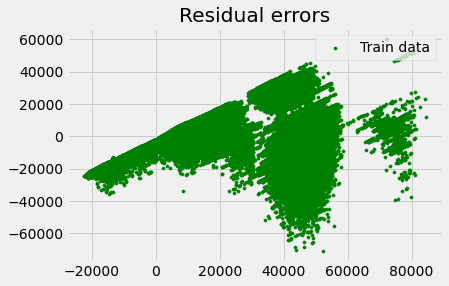

In [59]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, Y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, Y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
# plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test,
#            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

## Random forest model fitting

In [55]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, Y_train) 

RandomForestRegressor(random_state=0)

In [56]:
Y_pred = regressor.predict(np.array(X_test)) # test the output by changing values


Accuracy for the Random forest 

In [57]:
regressor.score(X_test,Y_test)


0.9855784606815402